# EDA: Listings 

This notebooked is intended to conduct exploratory data analysis on the listings.csv data. 

---

## Import Libraries, Read in Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from descartes.patch import PolygonPatch

#importing the vincenty distance calculator to calculate the distance between lat/long coordinates
from geopy.distance import vincenty

%matplotlib inline

In [2]:
# !pip install geopandas

In [3]:
# !pip install descartes

In [4]:
# Read in Listings data
listings = pd.read_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/listings.csv')
# Check shape for total number of listings
listings.shape

(9189, 16)

In [5]:
# Look at Listings data
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3344,"White House/Center City, 1 roommate",4957,A.J.,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90126,-77.02857,Private room,58,90,11,2016-08-31,0.09,2,358
1,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,NaN,"Shaw, Logan Circle",38.91046,-77.01933,Entire home/apt,433,2,171,2019-08-26,1.32,5,307
2,3662,Vita's Hideaway II,4645,Vita,NaN,Historic Anacostia,38.86193,-76.98963,Private room,65,2,36,2019-04-14,0.35,3,296
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,NaN,"Howard University, Le Droit Park, Cardozo/Shaw",38.91842,-77.02750,Private room,75,2,79,2018-07-25,1.44,1,361
4,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86314,-76.98836,Private room,55,2,71,2019-08-05,0.66,3,283


In [6]:
# how many unique listings are there
listings['id'].nunique()
# same size as df

9189

In [7]:
# listings['last_review'].sort_values()

---

## Summary Stats

In [8]:
# Look at describe stats
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.189000e+03,9.189000e+03,0.0,9189.000000,9189.000000,9189.000000,9189.00000,9189.000000,7421.000000,9189.000000,9189.000000
mean,1.980641e+07,6.053887e+07,NaN,38.911971,-77.017908,197.084558,5.57928,38.988791,2.010132,8.486560,127.113614
std,1.049327e+07,6.849793e+07,NaN,0.023371,0.029230,308.754577,19.49065,64.184896,2.121140,23.161285,131.208827
min,3.344000e+03,1.585000e+03,NaN,38.820370,-77.121280,10.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,1.251382e+07,9.419684e+06,NaN,38.899530,-77.037300,80.000000,1.00000,1.000000,0.330000,1.000000,0.000000
50%,1.876655e+07,3.331386e+07,NaN,38.911210,-77.020250,118.000000,2.00000,11.000000,1.210000,1.000000,84.000000
75%,2.854158e+07,9.545940e+07,NaN,38.924780,-76.997400,195.000000,3.00000,50.000000,3.110000,4.000000,254.000000
max,3.881766e+07,2.965228e+08,NaN,38.995490,-76.904820,10000.000000,600.00000,769.000000,12.970000,152.000000,365.000000


In [9]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
# Look at info stats
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9189 entries, 0 to 9188
Data columns (total 16 columns):
id                                9189 non-null int64
name                              9186 non-null object
host_id                           9189 non-null int64
host_name                         9188 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     9189 non-null object
latitude                          9189 non-null float64
longitude                         9189 non-null float64
room_type                         9189 non-null object
price                             9189 non-null int64
minimum_nights                    9189 non-null int64
number_of_reviews                 9189 non-null int64
last_review                       7421 non-null object
reviews_per_month                 7421 non-null float64
calculated_host_listings_count    9189 non-null int64
availability_365                  9189 non-null int64
dtypes: float64(4),

In [11]:
# Calculate distance from the National Mall to each Airbnb and use that as a variable

# define lat and long of the national mall (coordinates taken from Google maps)
lat_mall = 38.889770
lon_mall = -77.023653

# add them to the df
listings['lat_mall'] = lat_mall
listings['lon_mall'] = lon_mall

# create a new column that displays the distance between the listing and the national mall using vincenty forumla
listings['distance_mall'] = listings.apply(lambda x: vincenty((x['latitude'], x['longitude']), 
                                                              (x['lat_mall'], x['lon_mall'])).miles, axis=1)

# Was able to determine vincenty should be used by referencing this article: https://towardsdatascience.com/
# digging-into-airbnb-data-reviews-sentiments-superhosts-and-prices-prediction-part1-6c80ccb26c6a

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  del sys.path[0]


---

## Missing Data

In [12]:
# check for null values
listings.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                            1
neighbourhood_group               9189
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1768
reviews_per_month                 1768
calculated_host_listings_count       0
availability_365                     0
lat_mall                             0
lon_mall                             0
distance_mall                        0
dtype: int64

In [13]:
# listings[listings['name'].isnull()]
listings['name'].fillna('NA', inplace=True)

In [14]:
# listings[listings['host_name'].isnull()]
listings['host_name'].fillna('NA', inplace=True)

In [15]:
listings.drop(columns='neighbourhood_group', axis=1, inplace=True)

In [16]:
# listings[listings['last_review'].isnull()]
listings['last_review'].fillna(0.0, inplace=True)

In [17]:
listings['reviews_per_month'].fillna(0.0, inplace=True)

In [18]:
listings.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
lat_mall                          0
lon_mall                          0
distance_mall                     0
dtype: int64

---

## Price

In [19]:
# look at cheapest listings
listings[listings['price'] <= 30]
# 111 under $30 a night

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_mall,lon_mall,distance_mall
199,860776,Gorgeous cozy room available in the heart of Dc,315148,John,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91912,-77.01369,Private room,28,4,9,2019-08-22,0.27,25,282,38.88977,-77.023653,2.094590
239,1018211,"Sunny Room, Peaceful Neighborhood",509854,Elaine,"Brightwood Park, Crestwood, Petworth",38.94755,-77.03105,Private room,30,1,21,2019-08-11,0.27,1,30,38.88977,-77.023653,4.005597
240,1020841,"Brightwood Basement: private entrance, LR, BR, BA",5619026,Wendy,"Takoma, Brightwood, Manor Park",38.96540,-77.02368,Private room,25,1,32,2018-08-21,1.15,1,0,38.88977,-77.023653,5.217030
361,1838623,Furnished Rm South of Takoma D.C.,9542055,Diane,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",38.96788,-77.00875,Private room,25,30,2,2019-07-04,0.12,2,147,38.88977,-77.023653,5.447610
365,1841397,Furnished Lrg Rm S. of Takoma D.C.,9542055,Diane,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",38.96895,-77.00858,Private room,30,30,6,2017-12-10,0.10,2,273,38.88977,-77.023653,5.521964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,35513492,Cozy Room in a Funky Row House next to H St NE,28628169,Kristi,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90302,-76.98624,Private room,30,2,8,2019-09-08,2.38,1,28,38.88977,-77.023653,2.214213
8422,35714192,single apartment for rent(5 min from the metro),268148783,Yihao,"North Cleveland Park, Forest Hills, Van Ness",38.94100,-77.06163,Private room,30,1,4,2019-07-29,1.48,1,0,38.88977,-77.023653,4.083753
8491,36037856,Modern Green Home in the best walking neighbor...,271120083,Dale,"Howard University, Le Droit Park, Cardozo/Shaw",38.91646,-77.02957,Entire home/apt,10,2,16,2019-09-20,5.85,1,289,38.88977,-77.023653,1.868514
8970,37916753,"Cozy Up! Room Suite for Nurses, Interns & Stud...",106426179,Deb,"Takoma, Brightwood, Manor Park",38.96921,-77.02459,Private room,30,85,0,0,0.00,3,180,38.88977,-77.023653,5.480082


In [20]:
listings[listings['price'] > 8000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_mall,lon_mall,distance_mall
2844,15054700,Historic Georgetown Residence,95158537,Lindsey,"Georgetown, Burleith/Hillandale",38.90886,-77.06906,Entire home/apt,10000,4,0,0,0.0,1,358,38.88977,-77.023653,2.779346


In [21]:
# creating new dataframe without the highest outlier
adj_listings = listings[listings['price'] < 4500]

In [22]:
adj_listings.shape

(9184, 18)

In [23]:
# 5 locations above $4,500
listings[listings['price'] > 4500]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_mall,lon_mall,distance_mall
2747,14507861,Entire Capitol Hill Home - 5BR/4BA,19521188,Adrian,"Capitol Hill, Lincoln Park",38.88389,-77.00596,Entire home/apt,5995,5,0,0,0.0,2,365,38.88977,-77.023653,1.036533
2844,15054700,Historic Georgetown Residence,95158537,Lindsey,"Georgetown, Burleith/Hillandale",38.90886,-77.06906,Entire home/apt,10000,4,0,0,0.0,1,358,38.88977,-77.023653,2.779346
3820,16634189,Good Space for Good People,77013163,Janai,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90248,-77.01899,Entire home/apt,5500,3,0,0,0.0,1,363,38.88977,-77.023653,0.912065
3860,16661573,Inaguration Palace,18880505,Andrew,"Shaw, Logan Circle",38.91200,-77.02815,Entire home/apt,5000,1,0,0,0.0,2,0,38.88977,-77.023653,1.552480
4024,16769736,Gorgeous Georgian embassy-like home in DC,49351903,Rosa,"Spring Valley, Palisades, Wesley Heights, Foxh...",38.92245,-77.09232,Entire home/apt,5000,3,0,0,0.0,1,0,38.88977,-77.023653,4.333525


In [24]:
# dropping more outliers
# listings.drop(index=[2747, 3820, 3860, 4024], inplace=True)

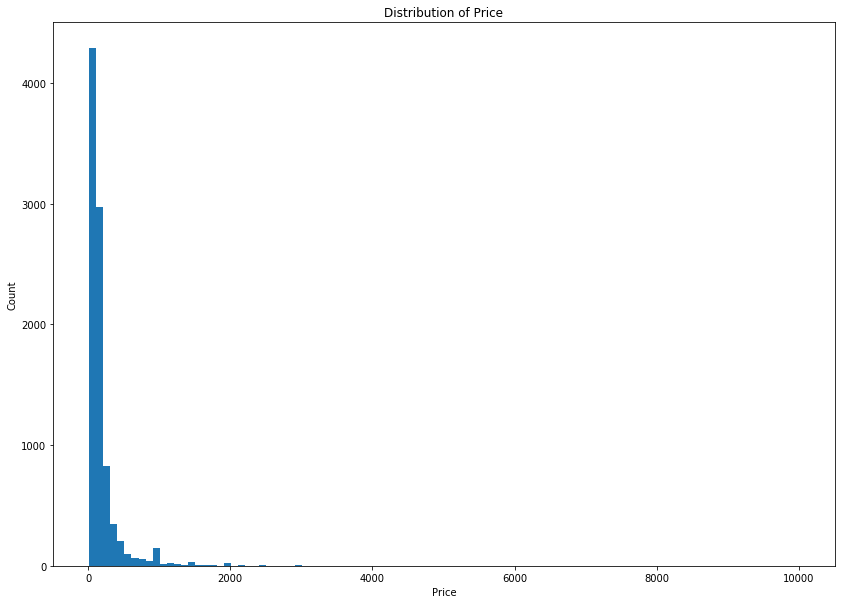

In [25]:
# Look at distribution of prices
plt.figure(figsize=(14, 10))
plt.hist(listings['price'], bins=100)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count');
# the outlier at $10,000 makes it difficult to see rest of distribution

In [26]:
# In above histrogram, since much of the data seems to be between 0 and $1,000, creating a new df focusing on that
affordable_listings = listings[listings['price'] < 1000]
affordable_listings.shape

(8982, 18)

In [27]:
8982/9189

0.9774730656219393

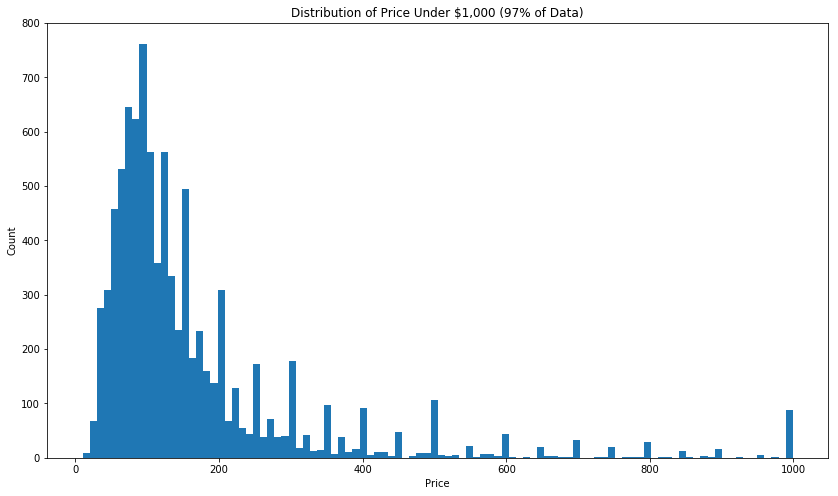

In [28]:
plt.figure(figsize=(14, 8))
plt.hist(affordable_listings['price'], bins=100)
plt.title('Distribution of Price Under $1,000 (97% of Data)')
plt.xlabel('Price')
plt.ylabel('Count');

In [29]:
# The bulk of the data is still around $300 or lower
# Also thinking logically - tourists might not spend more than $300 a night if they don't have to
cheap_listings = listings[listings['price'] < 300]
cheap_listings.shape

(7965, 18)

In [30]:
7965/9189
# cheap_listings represents 86% of the data

0.8667972575905974

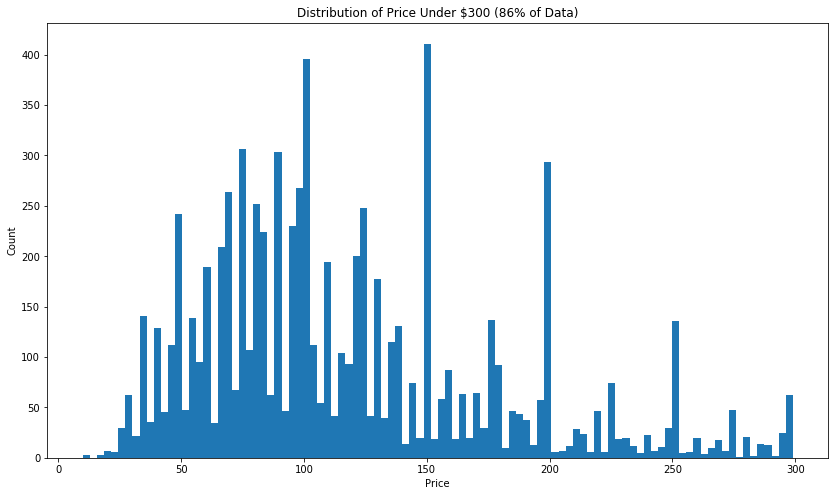

In [31]:
plt.figure(figsize=(14, 8))
plt.hist(cheap_listings['price'], bins=100)
plt.title('Distribution of Price Under $300 (86% of Data)')
plt.xlabel('Price')
plt.ylabel('Count');
# even with cheap_listings, still left skewed

In [32]:
listings.shape

(9189, 18)

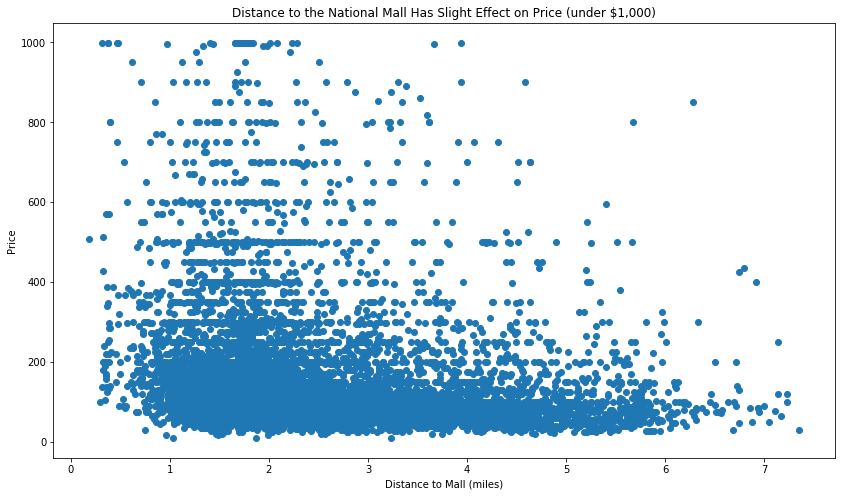

In [33]:
# looking at relationship between price and distance to the mall of affordable rentals
plt.figure(figsize=(14,8))

plt.scatter(affordable_listings['distance_mall'], affordable_listings['price'])
plt.title('Distance to the National Mall Has Slight Effect on Price (under $1,000)')
plt.xlabel('Distance to Mall (miles)')
plt.ylabel('Price');

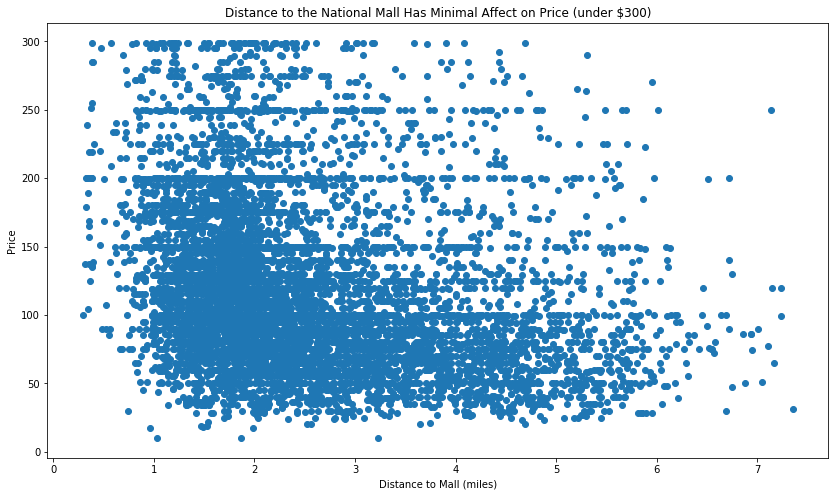

In [34]:
# looking at relationship between price and distance to the mall of cheap rentals
plt.figure(figsize=(14,8))

plt.scatter(cheap_listings['distance_mall'], cheap_listings['price'])
plt.title('Distance to the National Mall Has Minimal Affect on Price (under $300)')
plt.xlabel('Distance to Mall (miles)')
plt.ylabel('Price');

In [35]:
# look at the inauguration palace
listings[listings['name'] == "Inaguration Palace"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_mall,lon_mall,distance_mall
3860,16661573,Inaguration Palace,18880505,Andrew,"Shaw, Logan Circle",38.912,-77.02815,Entire home/apt,5000,1,0,0,0.0,2,0,38.88977,-77.023653,1.55248


In [36]:
# look at the price extremes - very cheap and very expensive
listings[listings['price'] < 25].shape

(19, 18)

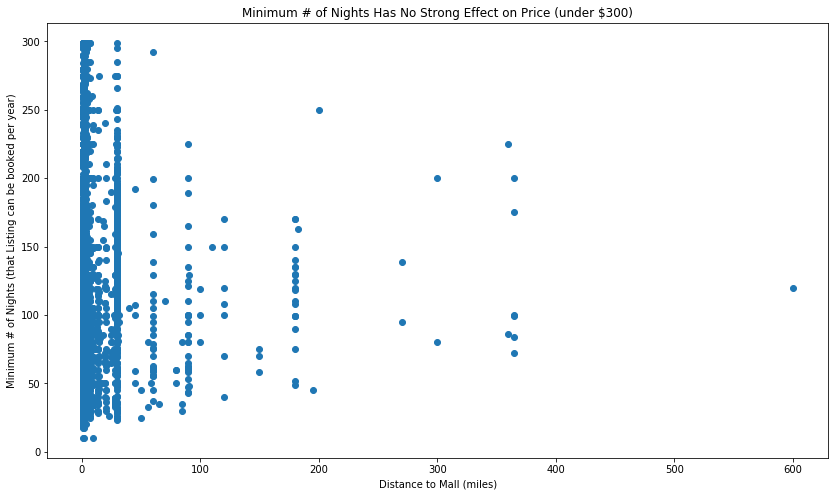

In [37]:
# Also look at relationship between price and minimum number of nights 
plt.figure(figsize=(14,8))

plt.scatter(cheap_listings['minimum_nights'], cheap_listings['price'])
plt.title('Minimum # of Nights Has No Strong Effect on Price (under $300)')
plt.xlabel('Distance to Mall (miles)')
plt.ylabel('Minimum # of Nights (that Listing can be booked per year)');
# doesn't seem to be much of a relationship

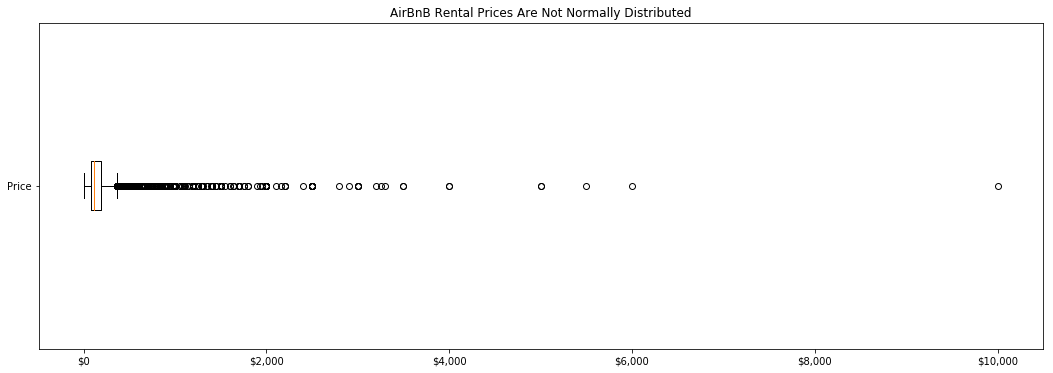

In [38]:
plt.figure(figsize=(18, 6))
plt.boxplot(listings['price'], vert=False)
plt.title('AirBnB Rental Prices Are Not Normally Distributed')
plt.yticks(ticks=[1], labels=['Price'])
plt.xticks(ticks=[0, 2000, 4000, 6000, 8000, 10000], labels=['$0', '$2,000', '$4,000', '$6,000', '$8,000','$10,000']);

In [39]:
# What is the average price per neighborhood? 
hood_price = listings.groupby('neighbourhood')['price'].mean()
hood_price = pd.DataFrame(hood_price)

In [40]:
hood_price['price'] = hood_price['price'].round(2)

In [41]:
hood_price

,price
neighbourhood,
"Brightwood Park, Crestwood, Petworth",143.96
"Brookland, Brentwood, Langdon",125.58
"Capitol Hill, Lincoln Park",226.52
"Capitol View, Marshall Heights, Benning Heights",111.00
"Cathedral Heights, McLean Gardens, Glover Park",206.85
"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",202.90
"Colonial Village, Shepherd Park, North Portal Estates",140.89
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",148.00
"Congress Heights, Bellevue, Washington Highlands",146.30


In [42]:
hood_price.index.values

array(['Brightwood Park, Crestwood, Petworth',
       'Brookland, Brentwood, Langdon', 'Capitol Hill, Lincoln Park',
       'Capitol View, Marshall Heights, Benning Heights',
       'Cathedral Heights, McLean Gardens, Glover Park',
       'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
       'Colonial Village, Shepherd Park, North Portal Estates',
       'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
       'Congress Heights, Bellevue, Washington Highlands',
       'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
       'Douglas, Shipley Terrace',
       'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
       'Dupont Circle, Connecticut Avenue/K Street',
       'Eastland Gardens, Kenilworth',
       'Edgewood, Bloomingdale, Truxton Circle, Eckington',
       'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
       'Friendship Heights, American University Park, Tenle

In [43]:
hood_labels = ['Brightwood Park','Brookland','Capitol Hill','Capitol View','Cathedral Heights','Cleveland Park',
               'Colonial Village','Columbia Heights','Congress Heights','Deanwood','Douglas','Downtown/Chinatown',
               'Dupont Circle','Eastland Gardens','Edgewood','Fairfax Village','Friendship Heights','Georgetown',
               'Chevy Chase', 'Historic Anacostia','Howard University','Trinidad','Adams Morgan','Fort Totten',
               'Mayfair','Navy Yard','North Cleveland Park','North Michigan Park','River Terrace','Shaw',
               'Southwest/Waterfront','Spring Valley','Takoma','Twining','Union Station','Foggy Bottom',
               'Woodland/Fort Stanton','Woodridge']

In [44]:
listings['neighbourhood'].nunique()

39

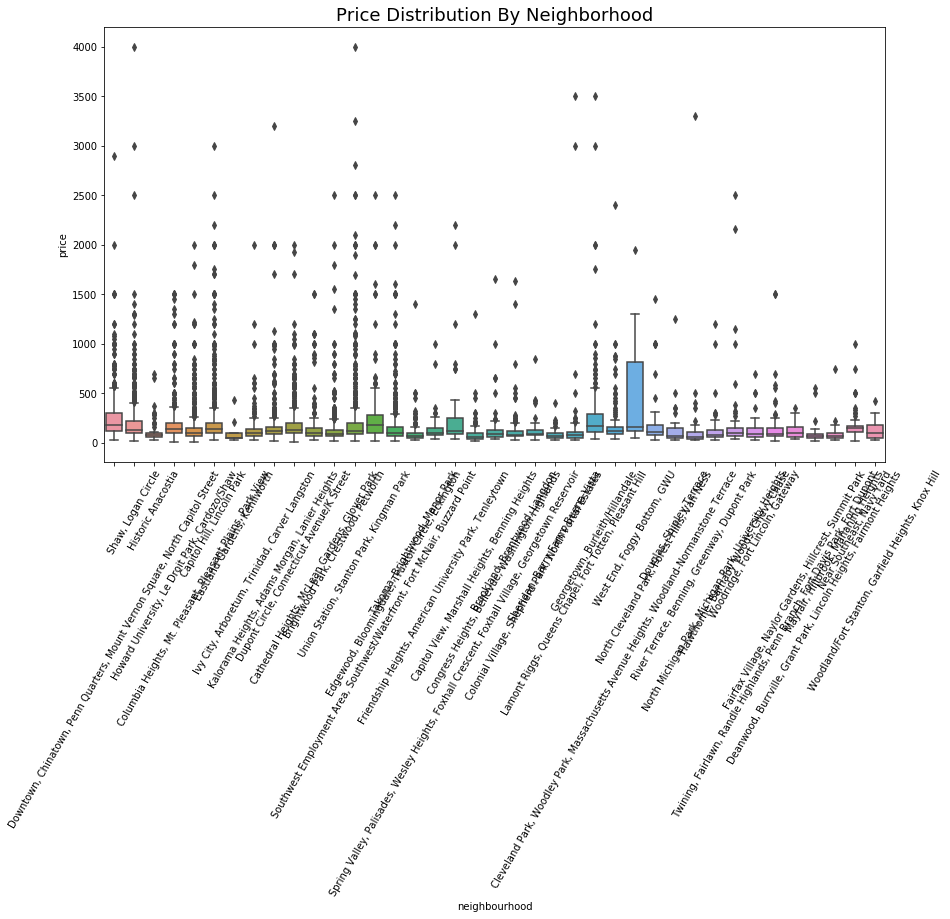

In [45]:
# colored boxplots of price distribution in each neighbourhood
plt.figure(figsize=(14, 8))
plt.title('Price Distribution By Neighborhood', size=18)
sns.boxplot(x='neighbourhood', y='price', data=adj_listings);
plt.xticks(rotation=60)
plt.savefig('Neighborhood Box plot.png')

---

## Location

In [46]:
# Do the neighbourhood values in listings line up to the 39 available in hoods CSV?

In [47]:
# Read in neighbourhood data
hoods = pd.read_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/neighbourhoods.csv')
# Check shape of hood data
hoods.shape

(39, 2)

In [48]:
listings['neighbourhood'].nunique()

39

In [49]:
# use a shape file to map out neighbourhoods according to average price
# read in the geo data of the DC neighbourhoods
hood_geo = pd.read_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/neighbourhoods.geojson')

In [50]:
# set the filepath and load in geo data
fp = "/Users/jessieowens2/Desktop/general_assembly/airbnb_data/neighbourhoods.geojson"
map_df = gpd.read_file(fp)
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,"Congress Heights, Bellevue, Washington Highlands",None,"MULTIPOLYGON (((-77.01389 38.82865, -77.01386 ..."
1,"Douglas, Shipley Terrace",None,"MULTIPOLYGON (((-76.99291 38.85391, -76.99231 ..."
2,"Woodland/Fort Stanton, Garfield Heights, Knox ...",None,"MULTIPOLYGON (((-76.97714 38.85728, -76.97721 ..."
3,"Near Southeast, Navy Yard",None,"MULTIPOLYGON (((-76.97936 38.87756, -76.97937 ..."
4,"River Terrace, Benning, Greenway, Dupont Park",None,"MULTIPOLYGON (((-76.93760 38.88996, -76.93752 ..."


In [51]:
map_df.shape

(39, 3)

<Figure size 1152x1152 with 0 Axes>

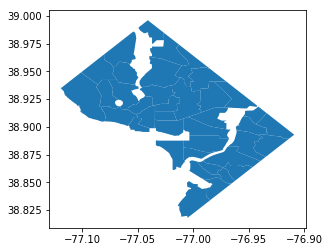

In [52]:
# plot the neigbourhood outlines
plt.figure(figsize=(16, 16))
map_df.plot();

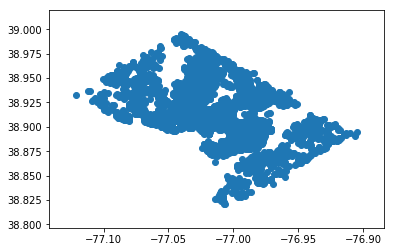

In [53]:
# looks very similar to just plotting a scatter plot of the listings lat/long points
plt.scatter(x=listings['longitude'], y=listings['latitude'])

In [54]:
# merge with the average price per neighbourhood info
merged = map_df.set_index('neighbourhood').join(hood_price)
merged.head()

,neighbourhood_group,geometry,price
neighbourhood,,,
"Congress Heights, Bellevue, Washington Highlands",None,"MULTIPOLYGON (((-77.01389 38.82865, -77.01386 ...",146.30
"Douglas, Shipley Terrace",None,"MULTIPOLYGON (((-76.99291 38.85391, -76.99231 ...",155.53
"Woodland/Fort Stanton, Garfield Heights, Knox Hill",None,"MULTIPOLYGON (((-76.97714 38.85728, -76.97721 ...",143.50
"Near Southeast, Navy Yard",None,"MULTIPOLYGON (((-76.97936 38.87756, -76.97937 ...",175.38
"River Terrace, Benning, Greenway, Dupont Park",None,"MULTIPOLYGON (((-76.93760 38.88996, -76.93752 ...",151.45


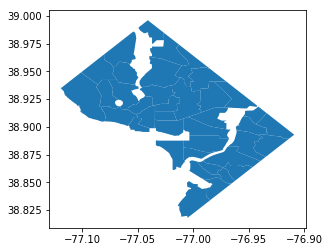

In [55]:
merged.plot()

In [56]:
merged = merged.reset_index()

In [57]:
merged.sort_values('price')

,neighbourhood,neighbourhood_group,geometry,price
8,"Deanwood, Burrville, Grant Park, Lincoln Heigh...",None,"MULTIPOLYGON (((-76.91322 38.88976, -76.91940 ...",90.51
28,"Sheridan, Barry Farm, Buena Vista",None,"MULTIPOLYGON (((-76.98347 38.85715, -76.98303 ...",91.27
7,"Mayfair, Hillbrook, Mahaning Heights",None,"MULTIPOLYGON (((-76.94372 38.90239, -76.94371 ...",92.15
22,"Takoma, Brightwood, Manor Park",None,"MULTIPOLYGON (((-77.03651 38.97225, -77.03642 ...",99.72
12,"Eastland Gardens, Kenilworth",None,"MULTIPOLYGON (((-76.94400 38.91626, -76.94398 ...",108.73
10,"Capitol View, Marshall Heights, Benning Heights",None,"MULTIPOLYGON (((-76.93291 38.89263, -76.93158 ...",111.00
27,"Fairfax Village, Naylor Gardens, Hillcrest, Su...",None,"MULTIPOLYGON (((-76.96773 38.86579, -76.96757 ...",119.25
26,Historic Anacostia,None,"MULTIPOLYGON (((-76.99514 38.86721, -76.99514 ...",119.34
35,"Woodridge, Fort Lincoln, Gateway",None,"MULTIPOLYGON (((-76.95969 38.91687, -76.96032 ...",121.20
18,"North Michigan Park, Michigan Park, University...",None,"MULTIPOLYGON (((-77.00279 38.93963, -77.00297 ...",124.38


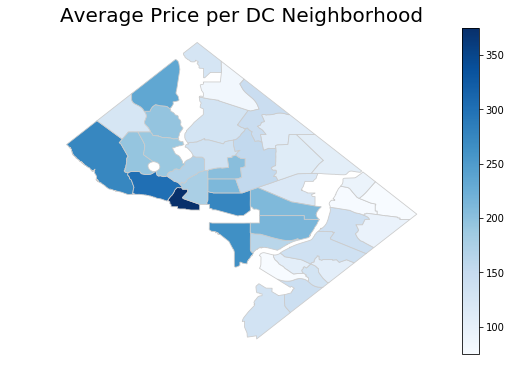

In [58]:
# plot the average price per neighbourhood
# set a variable
variable = 'price'
# set the range for the map
vmin, vmax = 75, 375
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# move axes
ax.axis('off')
# add title
ax.set_title('Average Price per DC Neighborhood', fontdict={'fontsize': '20', 'fontweight': '2'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.show();

# Most expensive neighbourhood is West End/Foggy Bottom/GWU
# Least expensive neighbourhood is Deanwood, Burrville, Grant Park, Lincoln Heights...
# Reference following article and code on how to create this map: https://towardsdatascience.com/lets-make-a-map-
# using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [59]:
pd.options.display.max_rows = 999

In [60]:
# shortening the neighbourhood names. For almost all, I picked the first neighbourhood listed in the collection
neighbourhood_dictionary = {'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street': 
                            'Downtown',
                            'Shaw, Logan Circle': 'Shaw', 
                            'Historic Anacostia': 'Anacostia', 
                            'Howard University, Le Droit Park, Cardozo/Shaw': 'Howard U', 
                            'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View': 'Columbia Heights',
                            'Capitol Hill, Lincoln Park': 'Capitol Hill', 
                            'Eastland Gardens, Kenilworth': 'Eastland Gardens',
                            'Ivy City, Arboretum, Trinidad, Carver Langston': 'Ivy City',
                            'Kalorama Heights, Adams Morgan, Lanier Heights': 'Adams Morgan',
                            'Dupont Circle, Connecticut Avenue/K Street': 'Dupont Circle',
                            'Cathedral Heights, McLean Gardens, Glover Park': 'Cathedral Heights',
                            'Brightwood Park, Crestwood, Petworth': 'Brightwood Park',
                            'Union Station, Stanton Park, Kingman Park': 'Union Station',
                            'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point': 'Southwest',
                            'Edgewood, Bloomingdale, Truxton Circle, Eckington': 'Edgewood',
                            'Takoma, Brightwood, Manor Park': 'Takoma',
                            'Friendship Heights, American University Park, Tenleytown': 'Friendship Heights',
                            'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir': 
                            'Spring Valley',
                            'Capitol View, Marshall Heights, Benning Heights': 'Capitol View',
                            'Congress Heights, Bellevue, Washington Highlands': 'Congress Heights',
                            'Brookland, Brentwood, Langdon': 'Brookland',
                            'Colonial Village, Shepherd Park, North Portal Estates': 'Colonial Village',
                            'Sheridan, Barry Farm, Buena Vista': 'Sheridan',
                            'Lamont Riggs, Queens Chapel, Fort Totten, Pleasant Hill': 'Lamont Riggs',
                            'Georgetown, Burleith/Hillandale': 'Georgetown',
                            'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace': 
                            'Cleveland Park',
                            'West End, Foggy Bottom, GWU': 'West End',
                            'North Cleveland Park, Forest Hills, Van Ness': 'Van Ness',
                            'Douglas, Shipley Terrace': 'Douglas',
                            'River Terrace, Benning, Greenway, Dupont Park': 'River Terrace',
                            'North Michigan Park, Michigan Park, University Heights': 'North Michigan Park',
                            'Hawthorne, Barnaby Woods, Chevy Chase': 'Hawthorne',
                            'Woodridge, Fort Lincoln, Gateway': 'Woodridge',
                            'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont': 'Twining',
                            'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park': 'Fairfax Village',
                            'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights': 'Deanwood',
                            'Mayfair, Hillbrook, Mahaning Heights': 'Mayfair',
                            'Near Southeast, Navy Yard': 'Navy Yard',
                            'Woodland/Fort Stanton, Garfield Heights, Knox Hill': 'Woodland/Fort Stanton'}

In [61]:
listings['neighbourhood'] = listings['neighbourhood'].replace(neighbourhood_dictionary)

In [62]:
listings['neighbourhood'].unique()

array(['Downtown', 'Shaw', 'Anacostia', 'Howard U', 'Columbia Heights',
       'Capitol Hill', 'Eastland Gardens', 'Ivy City', 'Adams Morgan',
       'Dupont Circle', 'Cathedral Heights', 'Brightwood Park',
       'Union Station', 'Southwest', 'Edgewood', 'Takoma',
       'Friendship Heights', 'Spring Valley', 'Capitol View',
       'Congress Heights', 'Brookland', 'Colonial Village', 'Sheridan',
       'Lamont Riggs', 'Georgetown', 'Cleveland Park', 'West End',
       'Van Ness', 'Douglas', 'River Terrace', 'North Michigan Park',
       'Hawthorne', 'Woodridge', 'Twining', 'Fairfax Village', 'Deanwood',
       'Mayfair', 'Navy Yard', 'Woodland/Fort Stanton'], dtype=object)

---

## Hosts

In [63]:
# debated removing host names for ethical reasons but decided not to since they are only first names

In [64]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,lat_mall,lon_mall,distance_mall
0,3344,"White House/Center City, 1 roommate",4957,A.J.,Downtown,38.90126,-77.02857,Private room,58,90,11,2016-08-31,0.09,2,358,38.88977,-77.023653,0.835733
1,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,Shaw,38.91046,-77.01933,Entire home/apt,433,2,171,2019-08-26,1.32,5,307,38.88977,-77.023653,1.446107
2,3662,Vita's Hideaway II,4645,Vita,Anacostia,38.86193,-76.98963,Private room,65,2,36,2019-04-14,0.35,3,296,38.88977,-77.023653,2.655859
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,Howard U,38.91842,-77.02750,Private room,75,2,79,2018-07-25,1.44,1,361,38.88977,-77.023653,1.987145
4,3686,Vita's Hideaway,4645,Vita,Anacostia,38.86314,-76.98836,Private room,55,2,71,2019-08-05,0.66,3,283,38.88977,-77.023653,2.644969


In [65]:
# the 'calculated_host_listings_count' represents how many listings a given host has. This name isn't intuitive so 
# changing to something easier to read
lph_dict = {'calculated_host_listings_count': 'listings_per_host'}
listings.rename(columns=lph_dict, inplace=True)

In [125]:
listings[listings['listings_per_host'] < 2]

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,neighbourhood_Sheridan,neighbourhood_Southwest,neighbourhood_Spring Valley,neighbourhood_Takoma,neighbourhood_Twining,neighbourhood_Union Station,neighbourhood_Van Ness,neighbourhood_West End,neighbourhood_Woodland/Fort Stanton,neighbourhood_Woodridge
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,38.91842,-77.02750,Private room,75,2,79,...,0,0,0,0,0,0,0,0,0,0
5,3771,Mt. Pleasant,4795,Charlene,38.92760,-77.03926,Private room,88,1,1,...,0,0,0,0,0,0,0,0,0,0
7,4501,DC Rowhouse,1585,Kip,38.91331,-77.02436,Private room,475,2,120,...,0,0,0,0,0,0,0,0,0,0
15,13744,"Heart of the City -HalfBlock to METRO, Restaur...",53927,Victoria,38.92905,-77.03084,Entire home/apt,125,4,22,...,0,0,0,0,0,0,0,0,0,0
16,13824,Natural Setting in DC,54317,Chris & Erin,38.95845,-77.03764,Entire home/apt,100,2,162,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,38773382,Bright and Large Bedroom with a Queen Bed,296522778,Mahmut,38.95494,-77.02293,Private room,60,1,0,...,0,0,0,0,0,0,0,0,0,0
9181,38782183,Super convenient location close to Washington DC,2447830,Charles,38.96377,-77.08836,Entire home/apt,100,1,0,...,0,0,0,0,0,0,0,0,0,0
9182,38783401,NEW! Stylish Garden Apartment in Hip Logan Circle,26266075,Amanda,38.91398,-77.02920,Entire home/apt,168,3,0,...,0,0,0,0,0,0,0,0,0,0
9186,38791915,Cute and quaint one bedroom in Capitol Hill!,147418156,Hannah,38.89774,-77.00193,Entire home/apt,80,30,0,...,0,0,0,0,0,1,0,0,0,0


In [126]:
# 54% of all listings are the sole listing for that host
4980/9189

0.5419523343127652

In [67]:
listings['availability_365'].value_counts()

0      2758
365     231
90      119
364      86
89       85
1        65
88       62
264      52
363      48
180      47
362      47
358      46
87       45
83       44
2        44
356      43
81       43
50       42
337      42
179      41
82       38
3        37
355      37
326      36
6        36
20       36
79       36
7        32
303      32
59       31
4        31
357      31
342      30
173      30
150      30
51       30
148      29
325      29
112      29
5        28
331      28
55       28
80       28
348      28
334      27
47       27
345      26
161      26
140      26
53       26
153      26
48       26
154      26
152      25
333      25
86       25
65       25
60       25
335      25
332      24
156      24
336      24
166      24
346      24
330      24
351      24
282      23
349      23
323      23
91       23
177      23
62       23
63       23
13       23
360      23
343      23
327      23
18       23
92       23
146      23
66       23
143      23
157      22
149 

In [68]:
# Listings per host max is 152 - is this an outlier?
listings.groupby('host_id')['id'].count().sort_values()

host_id
1585           1
51544429       1
51520718       1
51518514       1
51499024       1
            ... 
39930655      47
8008783       55
46630199      64
107434423     95
48005494     152
Name: id, Length: 6076, dtype: int64

In [69]:
# one host has 152 properties - 'Zeus'
zeus = listings[listings['host_id'] == 48005494]
# do an analysis of zeus

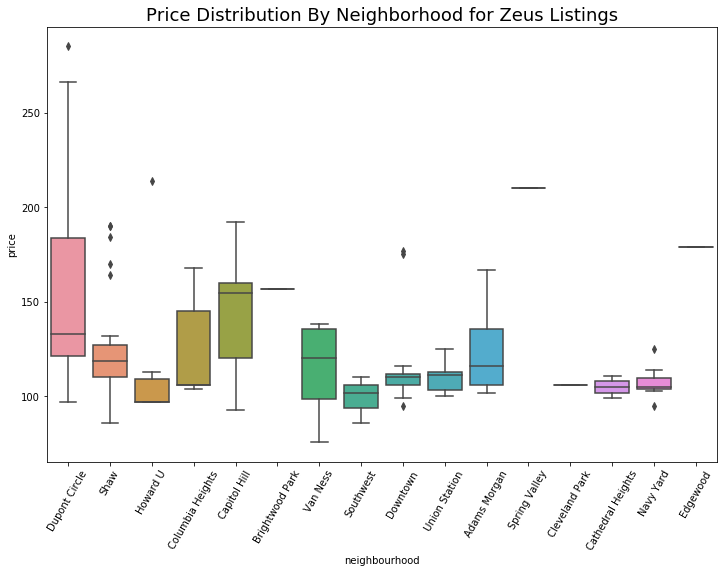

In [70]:
# colored boxplots of price distribution in each neighbourhood
plt.figure(figsize=(12, 8))
plt.title('Price Distribution By Neighborhood for Zeus Listings', size=18)
sns.boxplot(x='neighbourhood', y='price', data=zeus);
plt.xticks(rotation=60)
plt.savefig('Neighborhood Box plot.png')

In [71]:
zeus.groupby('neighbourhood')['price'].mean().sort_values()

neighbourhood
Southwest             99.333333
Cathedral Heights    105.000000
Cleveland Park       106.000000
Navy Yard            107.375000
Union Station        109.428571
Van Ness             113.750000
Downtown             117.461538
Howard U             119.166667
Adams Morgan         125.250000
Shaw                 125.785714
Columbia Heights     125.800000
Capitol Hill         144.166667
Dupont Circle        152.581818
Brightwood Park      157.000000
Edgewood             179.000000
Spring Valley        210.000000
Name: price, dtype: float64

In [72]:
zeus.groupby('room_type')['price'].mean()

room_type
Entire home/apt    132.611842
Name: price, dtype: float64

In [73]:
zeus['room_type'].value_counts()

Entire home/apt    152
Name: room_type, dtype: int64

In [74]:
zeus.groupby('neighbourhood')['distance_mall'].mean().sort_values()

neighbourhood
Downtown             1.018603
Shaw                 1.273853
Southwest            1.348773
Navy Yard            1.355079
Edgewood             1.404412
Union Station        1.691140
Dupont Circle        1.716493
Capitol Hill         1.851982
Howard U             2.026811
Columbia Heights     2.276950
Adams Morgan         2.482600
Brightwood Park      3.405152
Spring Valley        3.501150
Van Ness             3.992675
Cleveland Park       4.042511
Cathedral Heights    4.103002
Name: distance_mall, dtype: float64

In [116]:
zeus['price'].mean()

132.61184210526315

In [117]:
zeus['availability_365'].mean()

271.76973684210526

In [106]:
# Analysis of how much Zeus makes from his listings
# create an adjusted price variable - AirBnB takes 3% service fee for using their platform
# https://www.airbnb.com/help/article/1857/what-is-the-airbnb-service-fee
zeus['adj_price'] = zeus['price'] - (zeus['price'] * .03)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,lat_mall,lon_mall,distance_mall,adj_price
6919,28668627,1 Bedroom Condo in Dupont Circle,48005494,Zeus,Dupont Circle,38.91335,-77.04301,Entire home/apt,206,30,0,0,0.00,152,100,38.88977,-77.023653,1.932444,199.82
6920,28668727,3BR Townhouse in Logan Circle,48005494,Zeus,Shaw,38.91070,-77.03050,Entire home/apt,190,30,2,2019-05-07,0.37,152,280,38.88977,-77.023653,1.490191,184.30
6926,28695857,2 Bedroom Place in Great Location,48005494,Zeus,Dupont Circle,38.91602,-77.03792,Entire home/apt,141,30,2,2019-08-05,0.22,152,357,38.88977,-77.023653,1.967270,136.77
6931,28719542,3BR House in Washington,48005494,Zeus,Howard U,38.91506,-77.02841,Entire home/apt,214,30,1,2019-01-31,0.13,152,365,38.88977,-77.023653,1.763264,207.58
6952,28835868,2BR Condominium in Washington,48005494,Zeus,Columbia Heights,38.92061,-77.03385,Entire home/apt,145,30,1,2019-06-28,0.34,152,356,38.88977,-77.023653,2.197214,140.65


In [109]:
# create a yearly profit variable: the adjusted price multiplied by the availability of that listing in a year
zeus['yearly_profit'] = zeus['adj_price'] * zeus['availability_365']

In [113]:
# the sum of yearly profit for all listings
zeus_annual_profit = zeus['yearly_profit'].sum()

In [114]:
# using a 51.85% occupancy rate, calculate Zeus' annual profit
zeus_annual_profit * .5185
# $2,726,732.41
# occupancy rate: https://www.mashvisor.com/blog/airbnb-investment-strategy-washington-dc-real-estate/

2726732.41174

In [115]:
2726732.41 / 152

17939.029013157895

---

---

---

## Room Type

In [76]:
# look at how many of each room type there are 
listings['room_type'].value_counts()

Entire home/apt    6567
Private room       2363
Shared room         207
Hotel room           52
Name: room_type, dtype: int64

In [77]:
roomtype_value_counts = [6567, 2363, 207, 52]

In [78]:
roomtypes = ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']

In [79]:
# average price per room type
listings.groupby('room_type')['price'].mean()

room_type
Entire home/apt    236.583524
Hotel room         198.250000
Private room       100.345324
Shared room         48.024155
Name: price, dtype: float64

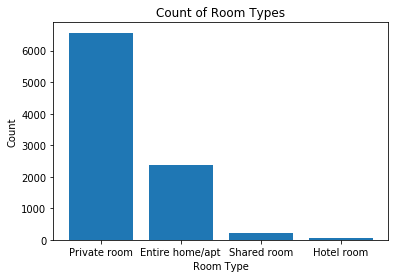

In [80]:
# plot count of each room type to show what is most common
plt.bar(x=roomtypes, height=roomtype_value_counts)
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel("Count");

In [81]:
# which type of room gets the most reviews
listings.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt    39.261002
Hotel room         51.826923
Private room       39.326703
Shared room        23.270531
Name: number_of_reviews, dtype: float64

In [82]:
# room type has anything to do with distance from the mall
listings.groupby('room_type')['distance_mall'].mean()

room_type
Entire home/apt    2.335867
Hotel room         1.762316
Private room       2.865291
Shared room        2.456380
Name: distance_mall, dtype: float64

In [83]:
# Since this variable is categorical, going to add dummies for modeling later on
room_dummies = pd.get_dummies(listings, columns=['room_type'])

In [84]:
room_dummies.drop(columns=['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'listings_per_host',
       'availability_365', 'lat_mall', 'lon_mall', 'distance_mall', 'id'], inplace=True)

In [85]:
listings = listings.join(room_dummies, how='left')

---

## Reviews

In [86]:
# listings['last_review'] = pd.to_datetime(arg=listings['last_review'], format='%Y-%m-%d')

In [87]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,listings_per_host,availability_365,lat_mall,lon_mall,distance_mall,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3344,"White House/Center City, 1 roommate",4957,A.J.,Downtown,38.90126,-77.02857,Private room,58,90,...,0.09,2,358,38.88977,-77.023653,0.835733,0,0,1,0
1,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,Shaw,38.91046,-77.01933,Entire home/apt,433,2,...,1.32,5,307,38.88977,-77.023653,1.446107,1,0,0,0
2,3662,Vita's Hideaway II,4645,Vita,Anacostia,38.86193,-76.98963,Private room,65,2,...,0.35,3,296,38.88977,-77.023653,2.655859,0,0,1,0
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,Howard U,38.91842,-77.02750,Private room,75,2,...,1.44,1,361,38.88977,-77.023653,1.987145,0,0,1,0
4,3686,Vita's Hideaway,4645,Vita,Anacostia,38.86314,-76.98836,Private room,55,2,...,0.66,3,283,38.88977,-77.023653,2.644969,0,0,1,0


Time since last review - does this relate to anything? 

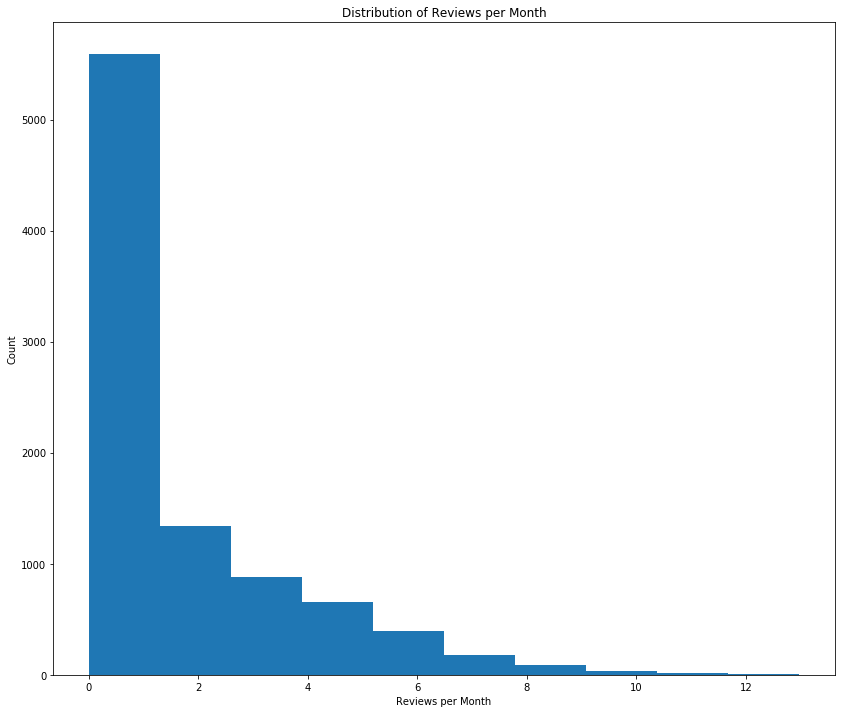

In [88]:
# Reviews per month max is around 13 - is this an outlier? 
plt.figure(figsize=(14, 12))
plt.hist(listings['reviews_per_month'])
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count');

Some listings haven't been reviewed in many years. Were they bad reviews? 

In [89]:
# Sorting on last review data to get an idea of how many reviews have not been reviewed recently
# listings['last_review'].sort_values()

Some listings have no reviews - how to handle those? still have valuable data. Also is a large chunk of the data

In [90]:
listings['reviews_per_month'].mean()

1.6233746871259083

In [91]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,listings_per_host,availability_365,lat_mall,lon_mall,distance_mall,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,9.189000e+03,9.189000e+03,9189.000000,9189.000000,9189.000000,9189.00000,9189.000000,9189.000000,9189.000000,9189.000000,9.189000e+03,9.189000e+03,9189.000000,9189.000000,9189.000000,9189.000000,9189.000000
mean,1.980641e+07,6.053887e+07,38.911971,-77.017908,197.084558,5.57928,38.988791,1.623375,8.486560,127.113614,3.888977e+01,-7.702365e+01,2.471481,0.714659,0.005659,0.257155,0.022527
std,1.049327e+07,6.849793e+07,0.023371,0.029230,308.754577,19.49065,64.184896,2.064313,23.161285,131.208827,4.782213e-12,8.583823e-12,1.189247,0.451601,0.075017,0.437090,0.148398
min,3.344000e+03,1.585000e+03,38.820370,-77.121280,10.000000,1.00000,0.000000,0.000000,1.000000,0.000000,3.888977e+01,-7.702365e+01,0.184999,0.000000,0.000000,0.000000,0.000000
25%,1.251382e+07,9.419684e+06,38.899530,-77.037300,80.000000,1.00000,1.000000,0.070000,1.000000,0.000000,3.888977e+01,-7.702365e+01,1.651210,0.000000,0.000000,0.000000,0.000000
50%,1.876655e+07,3.331386e+07,38.911210,-77.020250,118.000000,2.00000,11.000000,0.710000,1.000000,84.000000,3.888977e+01,-7.702365e+01,2.124553,1.000000,0.000000,0.000000,0.000000
75%,2.854158e+07,9.545940e+07,38.924780,-76.997400,195.000000,3.00000,50.000000,2.540000,4.000000,254.000000,3.888977e+01,-7.702365e+01,3.080973,1.000000,0.000000,1.000000,0.000000
max,3.881766e+07,2.965228e+08,38.995490,-76.904820,10000.000000,600.00000,769.000000,12.970000,152.000000,365.000000,3.888977e+01,-7.702365e+01,7.350078,1.000000,1.000000,1.000000,1.000000


In [92]:
listings[listings['reviews_per_month'] > 6]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,listings_per_host,availability_365,lat_mall,lon_mall,distance_mall,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
81,266852,Private Suite in Capitol Hill Home,1399272,Ken,Union Station,38.89661,-76.98703,Private room,77,2,...,7.15,3,326,38.88977,-77.023653,2.029870,0,0,1,0
116,453315,Efficiency suite in Capitol Hill,2252538,Adam And Jen,Union Station,38.89540,-76.98694,Entire home/apt,89,2,...,8.58,1,291,38.88977,-77.023653,2.016884,1,0,0,0
166,748316,Cozy Cabin in the City on Cap Hill,1399272,Ken,Union Station,38.89532,-76.98873,Entire home/apt,105,2,...,7.31,3,203,38.88977,-77.023653,1.921177,1,0,0,0
368,1855756,PRIVATE ROOM/YOUR OWN BATH/PARKING/BEST LOCATION,6429318,Tommy,Shaw,38.90669,-77.03305,Private room,90,1,...,6.51,2,38,38.88977,-77.023653,1.272330,0,0,1,0
427,2201654,Fun Mt. Pleasant Studio near Zoo!,11231930,Elizabeth,Columbia Heights,38.93049,-77.04279,Entire home/apt,94,1,...,6.77,1,318,38.88977,-77.023653,2.992268,1,0,0,0
450,2340172,Delightful historic flat minutes from Capitol ...,4073665,Sara,Twining,38.86968,-76.97227,Entire home/apt,160,2,...,7.55,1,148,38.88977,-77.023653,3.097746,1,0,0,0
533,2833952,Sunny Garden Studio-on DC Red Line,14497401,Elisabeth,Friendship Heights,38.95703,-77.08989,Entire home/apt,80,1,...,10.09,1,8,38.88977,-77.023653,5.853676,1,0,0,0
568,3103276,Attractive 2 Twin Beds Near Capitol,14275599,Heather,Capitol Hill,38.88415,-76.98995,Private room,70,2,...,6.36,9,261,38.88977,-77.023653,1.857915,0,0,1,0
575,3155265,Charming Carriage House w/ Deck - Apartment 2,95464,Syga,Edgewood,38.91188,-77.01024,Entire home/apt,122,2,...,6.37,3,306,38.88977,-77.023653,1.687849,1,0,0,0
620,3577680,Renovated Gem in Dupont Circle,11611752,Laura And Johnny,Dupont Circle,38.91513,-77.04016,Entire home/apt,142,1,...,6.58,4,0,38.88977,-77.023653,1.962618,1,0,0,0


---

## Additional notes on future actions

Unsupervised learning problem: analyzing factors that contribute to good reviews and predict on a new dataset? (should be oct and nov data by time of capstone) 

Try to predict price changes based on review sentiment? 

Does high availability of a listing have a relationship with anything? (review sentiment, number of reviews, price per night, neighbourhood, host?)

May or may not use time series to correlate data over time

Use archived calendar data set to account for seasonality or change over time

Look at how older events affected the price and see if this can predict how newer events will affect price (model)

## Transform Variables

In [93]:
listings.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,listings_per_host,availability_365,lat_mall,lon_mall,distance_mall,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3344,"White House/Center City, 1 roommate",4957,A.J.,Downtown,38.90126,-77.02857,Private room,58,90,...,0.09,2,358,38.88977,-77.023653,0.835733,0,0,1,0


In [94]:
listings.dtypes

id                             int64
name                          object
host_id                        int64
host_name                     object
neighbourhood                 object
latitude                     float64
longitude                    float64
room_type                     object
price                          int64
minimum_nights                 int64
number_of_reviews              int64
last_review                   object
reviews_per_month            float64
listings_per_host              int64
availability_365               int64
lat_mall                     float64
lon_mall                     float64
distance_mall                float64
room_type_Entire home/apt      uint8
room_type_Hotel room           uint8
room_type_Private room         uint8
room_type_Shared room          uint8
dtype: object

In [95]:
listings = pd.get_dummies(listings, columns=['neighbourhood'], drop_first=True)

## Train/Test/Val Split to Prep for Modeling

In [96]:
clean_listings = listings

In [97]:
clean_listings.to_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/clean_listings.csv', index=False)

In [98]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

# referenced this for help with this function: https://stackoverflow.com/questions/38250710/
# how-to-split-data-into-3-sets-train-validation-and-test

In [99]:
train, validate, test = train_validate_test_split(clean_listings, seed=54)

In [100]:
listings_train = train

In [101]:
listings_validate = validate

In [102]:
listings_test = test

In [103]:
listings_test.to_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/listings_test.csv', index=False)

In [104]:
listings_train.to_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/listings_train.csv', index=False)

In [105]:
listings_validate.to_csv('/Users/jessieowens2/Desktop/general_assembly/airbnb_data/listings_validate.csv', index=False)